## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
1/2 [==============>...............] - ETA: 0s - loss: 0.1601 - accuracy: 1.0000ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\shubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-69229fe26ea3>", line 3, in <module>
    r = model.fit_generator(
  File "C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1815, in fit_generator
    return self.fit(
  File "C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\shubh\anaconda3\lib\site-packages\tensor

TypeError: object of type 'NoneType' has no len()

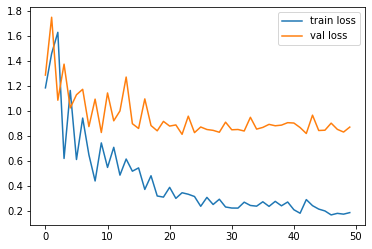

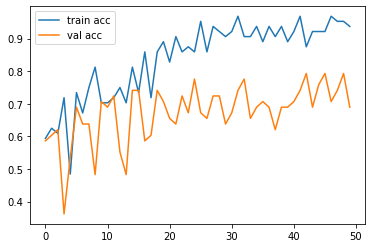

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[5.6016158e-02, 2.5484118e-01, 6.8914264e-01],
       [1.2020818e-03, 9.7231907e-01, 2.6478862e-02],
       [3.7171963e-01, 3.7659591e-01, 2.5168437e-01],
       [3.3956360e-02, 6.1240327e-01, 3.5364041e-01],
       [6.4780295e-02, 4.9502936e-01, 4.4019040e-01],
       [1.0734969e-02, 9.4155043e-01, 4.7714565e-02],
       [3.5904485e-01, 3.8414162e-01, 2.5681359e-01],
       [3.3342861e-02, 9.3167293e-01, 3.4984160e-02],
       [8.0209386e-01, 1.5230738e-01, 4.5598749e-02],
       [8.0859476e-01, 8.7482808e-03, 1.8265694e-01],
       [8.4841868e-06, 1.1851456e-03, 9.9880636e-01],
       [3.1506691e-02, 9.6775770e-01, 7.3556689e-04],
       [4.2522997e-01, 5.4266089e-01, 3.2109153e-02],
       [1.1710936e-01, 7.6123558e-02, 8.0676711e-01],
       [1.4026255e-02, 5.0523806e-01, 4.8073566e-01],
       [3.9833747e-02, 7.4669266e-01, 2.1347369e-01],
       [2.4300559e-01, 6.1400110e-01, 1.4299335e-01],
       [7.4858968e-03, 2.5880402e-02, 9.6663374e-01],
       [3.7424907e-02, 2.725

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [27]:
img=image.load_img('Datasets/Test/mercedes/29.jpg',target_size=(224,224))



In [28]:
x=image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]]

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[0.0188808 , 0.02818709, 0.9529321 ]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
a==1

array([False])